In [44]:
# importamos las librerías necesarias para trabajar.
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.set_option("display.max_columns", None)

In [45]:
data = pd.read_csv("datos_TP3.csv", index_col=0)


In [46]:
data.isna().sum().sort_values(ascending=False)/data.shape[0]*100

SORS             99.656729
Gate             99.349739
ContrastName     96.485659
Options          82.476435
Option           82.476435
NoWrap           45.239208
ScanMode          8.969001
Mode              8.969001
Gap               5.034641
Scan Comment      3.875753
Scan ID           0.004186
NAQ               0.000000
BW                0.000000
Fltr              0.000000
Study             0.000000
Coverages         0.000000
MTX               0.000000
FAT               0.000000
MTC               0.000000
Date              0.000000
Site_ID           0.000000
Dynamic           0.000000
NS                0.000000
FOV               0.000000
ST                0.000000
No                0.000000
FA                0.000000
TE                0.000000
TR                0.000000
Time              0.000000
Sequence          0.000000
Plane             0.000000
TxCoil            0.000000
RcCoil            0.000000
PatientOrient     0.000000
Anatomy           0.000000
Start             0.000000
S

In [47]:
data.Anatomy.value_counts(normalize=True)*100


Head         24.472012
TL-Spine     18.831065
Extremity    18.570821
Abdomen      11.228868
Shoulder      7.308462
Pelvis        7.000077
C-Spine       6.949842
Ankle         2.261960
Chest         1.966831
Hand          1.375177
???           0.034885
Name: Anatomy, dtype: float64

In [48]:
data.head()

,Study,No,Start,Scan ID,Mode,Scan Comment,Anatomy,PatientOrient,RcCoil,TxCoil,ContrastName,Plane,Sequence,Option,ScanMode,Time,TR,TE,FA,NS,ST,Gap,FOV,MTX,NAQ,BW,NoWrap,Options,Fltr,Gate,Coverages,Dynamic,SORS,FAT,MTC,Date,Site_ID,Site Name
0,34399.8268,0,07:36,Loc 3Axis M/S(,(AB),Loc 3Axis M/S(A),Abdomen,H:S,BODY,WB,NaN,Oth:Oth,FE_crt,NaN,(AB),00:15,35,4,25,9,8.0,8.0,45.0,136 x 256,1.0,244,NaN,NaN,NL1,NaN,3,OFF,NaN,OFF,OFF,2022-08-04,8268,Clínica Modelo de Morón
1,34399.8268,15,07:38,iMAP_ChestAbdo,(AB),MAP,Abdomen,H:S,BODY,WB,NaN,AX:AP,FE_map,NaN,(AB),00:13,185,4,20,23,6.0,18.0,50.0 x 58.5,32 x 64,1.0,488,RO,NaN,L1,NaN,1,OFF,NaN,OFF,OFF,2022-08-04,8268,Clínica Modelo de Morón
2,34399.8268,16,07:39,iAAS_ChestAbdo,(AB),Shimming,Abdomen,H:S,BODY,WB,NaN,AX:AP,FE_AAS,NaN,(AB),00:07,200,4.8/9.6,70,15,5.0,30.0,49.5,32,1.0,488,NaN,NaN,NL4,NaN,1,OFF,NaN,OFF,OFF,2022-08-04,8268,Clínica Modelo de Morón
3,34399.8268,2,07:41,T2 FASE,(AB),AX T2WI (BH) (FASE),Abdomen,H:S,BODY,WB,NaN,AX:AP,FASE2D+5,NaN,(AB),00:36,8032,60/+0(1),90/160,30,5.0,1.8,29.4 x 39.0,240 x 256,1.0,651,NaN,NaN,GA54,NaN,4,OFF,NaN,OFF,OFF,2022-08-04,8268,Clínica Modelo de Morón
4,34399.8268,11,07:46,T2WI,(A),AX T2WI (Resp),Abdomen,H:S,BODY,WB,NaN,AX:AP,FSE2D+10,NaN,(A),04:35,3643,80,90/160,30,5.0,2.3,30.0 x 38.0,256 x 336,1.0,244,NaN,NaN,GA42,Resp,5,OFF,NaN,OFF,OFF,2022-08-04,8268,Clínica Modelo de Morón


# Pre - Procesamiento

In [49]:
# Drop Columnas redundantes y que tienen gran cantidad de Nans
data.drop(columns=["SORS", "Gate", "ContrastName", "Options", "Option", "NoWrap", "Site_ID", "Date"], inplace=True)

In [50]:
# Drop filas con Nans restantes
data.dropna(axis=0, inplace=True)

In [51]:
# Elimino las filas con target "???""
data = data[data['Anatomy'] != "???"]

In [52]:
data.Anatomy.value_counts(normalize=True)*100

Head         25.294693
TL-Spine     19.468806
Extremity    18.768341
Abdomen      10.527712
Shoulder      7.214384
Pelvis        6.898553
C-Spine       6.857105
Ankle         2.366663
Hand          1.392642
Chest         1.211101
Name: Anatomy, dtype: float64

# Modelos

In [53]:
# Dividimos

X = data.drop(columns="Anatomy")
y = data.Anatomy

In [54]:
categorical = X.select_dtypes("object").columns

In [55]:
#Train y split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [56]:
# Creo Dummies

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown='ignore')

# Aplicamos OneHotEncoder al conjunto de entrenamiento
X_train = onehot.fit_transform(X_train)

# Aplicamos OneHotEncoder al conjunto de prueba
X_test = onehot.transform(X_test)


In [57]:
# Scalar
from sklearn import preprocessing

scaler = preprocessing.StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SCORES

In [58]:
# Funcion para Scores

resultados_fin = pd.DataFrame()

def evaluacion(y_test, y_pred, model=""):
    # Crear diccionario para almacenar los resultados
    resultados = {}

      # Calcular sensibilidad
    sensibilidad = metrics.recall_score(y_test, y_pred, average='macro')
    resultados['Sensibilidad'] = sensibilidad

    # Calcular accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    resultados['Accuracy'] = accuracy

    # Calcular precision
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    resultados['Precision'] = precision

    # Graficar matrix de confusion con heatmap
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y_test).tolist(), yticklabels=np.unique(y_pred).tolist())
    plt.title('Matrix de Confusion')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

    resultado_df = pd.DataFrame.from_dict(resultados, orient='index', columns=[model])
    resultados_fin[model] = resultado_df 
    return resultados_fin


# MODELOS


## Logistic Regression


In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

ypred_lr = lr.predict(X_test_scaled)


c:\Users\jpans\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


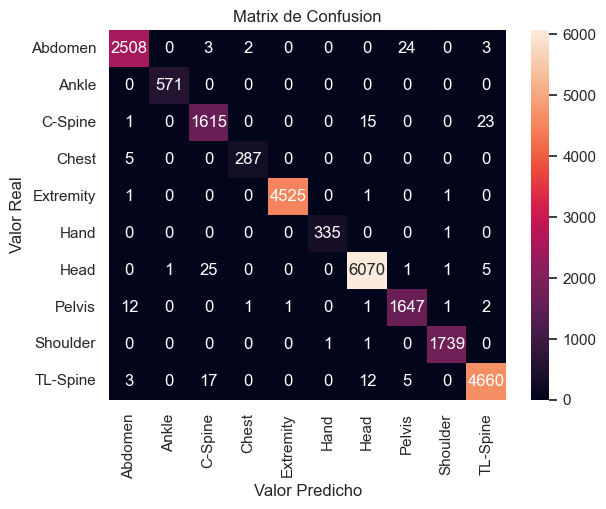

,Logistic_Regression
Sensibilidad,0.991782
Accuracy,0.992954
Precision,0.991677


In [60]:
evaluacion(y_test, ypred_lr, model="Logistic_Regression")

## KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyperparametros
parameters_knn = {"n_neighbors" : list(range(1, 15))}

clf_knn = GridSearchCV(knn, 
                   param_grid = parameters_knn, 
                   refit = True, 
                   cv = 5,
                   verbose=1,
                   n_jobs = -1) 
                   

# Fit el modelo ya seleccionado
clf_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


exception calling callback for <Future at 0x1a9a090c070 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\jpans\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "c:\Users\jpans\anaconda3\lib\multiprocessing\queues.py", line 117, in get
    res = self._recv_bytes()
  File "c:\Users\jpans\anaconda3\lib\multiprocessing\connection.py", line 221, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "c:\Users\jpans\anaconda3\lib\multiprocessing\connection.py", line 323, in _recv_bytes
    return self._get_more_data(ov, maxsize)
  File "c:\Users\jpans\anaconda3\lib\multiprocessing\connection.py", line 349, in _get_more_data
    f.write(ov.getbuffer())
MemoryError
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call la

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
print("Los mejores parametros fueron %s con un score de %0.2f" % (clf_knn.best_params_, clf_knn.best_score_))

Los mejores parametros fueron {'n_neighbors': 1} con un score de 0.63


In [ ]:
ypred_knn = clf_knn.predict(X_test_scaled)

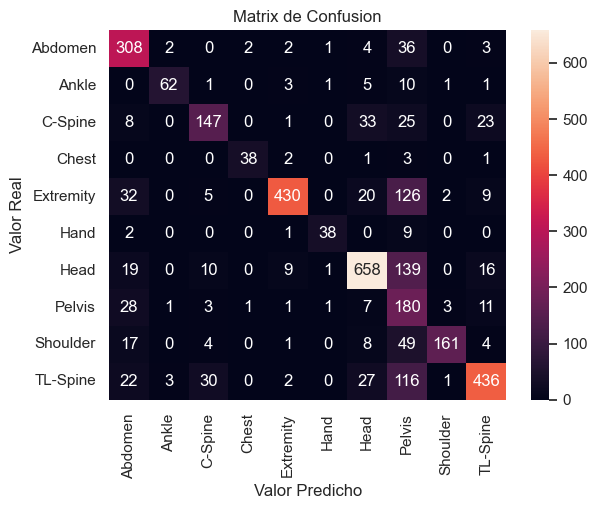

,Logistic_Regression,Naive_Bayes,KNN
Sensibilidad,0.938862,0.835067,0.739154
Accuracy,0.959014,0.852391,0.730027
Precision,0.956960,0.835159,0.808164


In [ ]:
evaluacion(y_test, ypred_knn, model="KNN")

## Naive Bayes

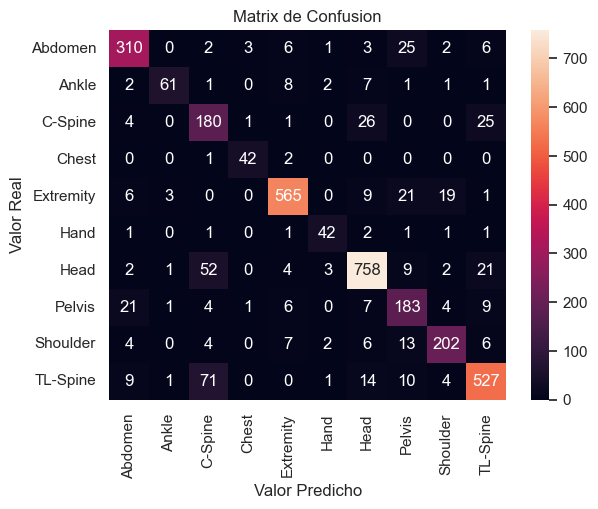

,Logistic_Regression,Naive_Bayes
Sensibilidad,0.938862,0.835067
Accuracy,0.959014,0.852391
Precision,0.956960,0.835159


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled.toarray(), y_train)

ypred_gnb = gnb.predict(X_test_scaled.toarray())
evaluacion(y_test, ypred_gnb, model="Naive_Bayes")